<a href="https://colab.research.google.com/github/joeplustenhouwer/academic-kickstart/blob/master/workshop_week_6_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import matplotlib.pyplot as plt
import numpy as np


In [48]:
sigma= 2
kappa=0.3
beta=0.99
rho=-np.log(beta)
phi_1=1
phi_2=0.01
std_rn=0.01

In [49]:
N=1000 #simualte N periods

Y=np.zeros(N)
Pi=np.zeros(N)
ni=np.zeros(N)#nominal interest rate
rn=np.zeros(N)
EY=np.zeros(N)
EPi=np.zeros(N)


In [50]:
for t in range(1,N):

    EY[t]=0
    EPi[t]=0

    rn[t]=rho+std_rn*np.random.randn()



#write model equations in form M z_t= N Ez_t+1 + c + d* rn[i]
#where M and N are martices and c and d are vectors
    M=np.array([[1,0,1/sigma],
                [-kappa,1,0],
                [-phi_2,-phi_1,1]])

    N=np.array([[1,1/sigma,0],
            [0,beta,0],
            [0,0,0]])

    c=np.array([0,0,0])

    d=np.array([1/sigma,0,1])



    RHS= np.dot(N,np.array([EY[t],EPi[t],0])) + c + d* rn[t]
    z=np.dot(np.linalg.inv(M),RHS)
    Y[t]=z[0]
    Pi[t]=z[1]
    ni[t]=z[2]

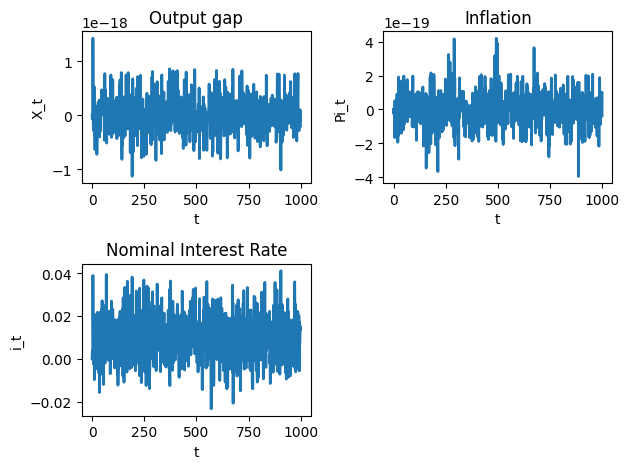

In [51]:
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(Y,linewidth=2)
plt.title('Output gap')
plt.ylabel('X_t')
plt.xlabel('t')



plt.subplot(2, 2, 2)
plt.plot(Pi,linewidth=2)
plt.title('Inflation')
plt.ylabel('Pi_t')
plt.xlabel('t')



plt.subplot(2, 2, 3)
plt.plot(ni,linewidth=2)
plt.title('Nominal Interest Rate')
plt.ylabel('i_t')
plt.xlabel('t')
plt.tight_layout() #



In [52]:
L=0.25*np.var(Y)+np.var(Pi)
print('Loss is:',L)

Loss is: 2.8215311781736586e-38
